In [1]:
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

#Keras is a high level neural networks library, based on either tensorflow or theano
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam


c:\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Load datasets

In [2]:
# define function to load train, test, and validation datasets
def load_dataset(path):
    
    print("Loading datasets...")
    df_train = pd.read_csv(path + 'exoTrain.csv', encoding = "ISO-8859-1")
    df_test = pd.read_csv(path + 'exoTest.csv', encoding = "ISO-8859-1")
    print("Loaded datasets!")
    return df_train, df_test

# load train, and test datasets
df_train, df_test = load_dataset('input/')

Loading datasets...
Loaded datasets!


The data set uses 2 for confirmed exoplants and 1 for non-exoplanets so convert these to 1 and 0 

In [3]:
df_train['LABEL'] = df_train['LABEL'].replace([1], [0])
df_train['LABEL'] = df_train['LABEL'].replace([2], [1])
df_test['LABEL'] = df_test['LABEL'].replace([1], [0])
df_test['LABEL'] = df_test['LABEL'].replace([2], [1])

## Print first 40 rows in training data set dataset

In [4]:
display(df_train.head(n=40))

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,1,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,1,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,1,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,1,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,1,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


LABEL -> 1 is an exoplanet star and 0 is a non-exoplanet-star.

FLUX1-FLUX3197 -> the light intensity recorded for each star, at a different point in time.

## Statisticts about the training dataset

In [5]:
# print statistics about the dataset
num_stars = len(df_train) - 1
training_exoplanets = len(df_train[df_train.LABEL == 1])
training_nonexoplanets = len(df_train[df_train.LABEL == 0])
percent = (training_exoplanets / num_stars) * 100.

print('There are {0:2d} training flux records.'.format(len(df_train) - 1))
print('There are %s confirmed exoplants in the training set' %training_exoplanets)
print('There are %s confirmed non-exoplants in the training set' %training_nonexoplanets)
print('{0:2f}% of the records are confirmed exoplants\n'.format(percent))


There are 5086 training flux records.
There are 37 confirmed exoplants in the training set
There are 5050 confirmed non-exoplants in the training set
0.727487% of the records are confirmed exoplants



## Statistics about the test dataset

In [6]:
num_stars = len(df_test) - 1
test_exoplanets = len(df_test[df_test.LABEL == 1])
test_nonexoplanets = len(df_test[df_test.LABEL == 0])
percent = (test_exoplanets / num_stars) * 100.

print('There are {0:2d} test flux recordss.'.format(num_stars))
print('There are %s confirmed exoplants in the training set' %test_exoplanets)
print('There are %s confirmed non-exoplants in the training set' %test_nonexoplanets)
print('{0:2f}% of the records are confirmed exoplants\n'.format(percent))


There are 569 test flux recordss.
There are 5 confirmed exoplants in the training set
There are 565 confirmed non-exoplants in the training set
0.878735% of the records are confirmed exoplants



In [7]:
def plot_series(series, title):
    plt.plot(np.arange(len(series)), series)
    plt.title(title)
    plt.xlabel('Time step')
    plt.ylabel('Luminosity')
    plt.show()  

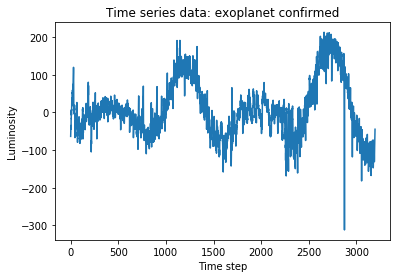

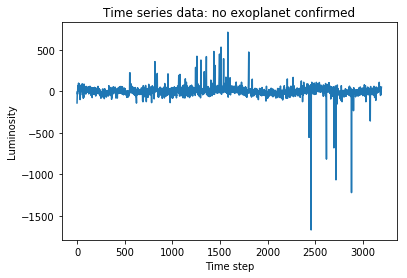

In [8]:
plot_series(df_train.iloc[28, 1:], 'Time series data: exoplanet confirmed')
plot_series(df_train.iloc[37, 1:], 'Time series data: no exoplanet confirmed')

Lots of candidate transits on the first example; the second (no planet) shows why this is such a difficult task - a drop in luminosity can be caused by other phenomena. Taking a closer look:

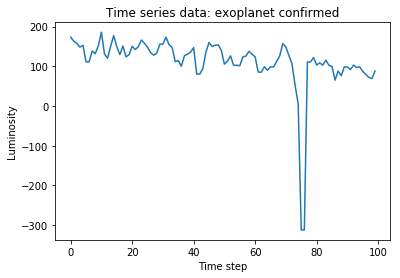

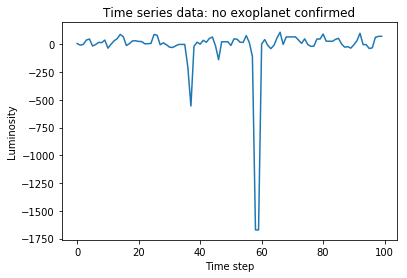

In [9]:
plot_series(df_train.iloc[28, 2800:2900], 'Time series data: exoplanet confirmed')
plot_series(df_train.iloc[37, 2400:2500], 'Time series data: no exoplanet confirmed')

The top figure appears to show a transit at around x=2875. However, a sharp dip in brightness alone does not indicate a transit - as shown in Figure 2. The network will have to look for subtle features.

Feature normalization is important for the CNN to work properly.

In [10]:
df_train_x = df_train.iloc[:, 1:]
df_test_x = df_test.iloc[:, 1:]

df_train_nm_x = pd.DataFrame(normalize(df_train_x.values))
df_train_y = df_train['LABEL'].values

x_test = normalize(df_test_x.values)
y_test = df_test['LABEL'].values

Now we have normalized the data we will augment the training set so it is not as badly imbalanced. I will use SMOTE to add more confirmed exoplantes to the normalized training set.

In [12]:
X_t, X_CV, y_t, y_CV = train_test_split(df_train_nm_x, df_train_y, test_size=0.2, random_state=30, stratify=df_train_y)

sm = SMOTE(random_state=30, ratio=0.5)
X_resampled, y_resampled = SMOTE().fit_sample(X_t, y_t)
#X_resampled, y_resampled = X_t, y_t
num_stars = len(X_resampled)
training_exoplanets = 0
for item in y_resampled:
    if item == 1:
        training_exoplanets+=1

percent = (training_exoplanets / num_stars) * 100.
print('There are {0:2d} training flux records.'.format(num_stars))
print('There are %s confirmed non-exoplants in the training set' %training_exoplanets)
print('{0:2f}% of the records are confirmed exoplants\n'.format(percent))

num_stars = len(X_CV)
training_exoplanets = 0
for item in y_CV:
    if item == 1:
        training_exoplanets+=1

percent = (training_exoplanets / num_stars) * 100.
print('There are {0:2d} validation flux records.'.format(num_stars))
print('There are %s confirmed non-exoplants in the validation set' %training_exoplanets)
print('{0:2f}% of the records are confirmed exoplants\n'.format(percent))

There are 8078 training flux records.
There are 4039 confirmed non-exoplants in the training set
50.000000% of the records are confirmed exoplants

There are 1018 validation flux records.
There are 7 confirmed non-exoplants in the validation set
0.687623% of the records are confirmed exoplants



Train the model

In [13]:
# we want a numpy array not a dataframe
X_CV = X_CV.values

# reshape for keras
X_resampled = X_resampled.reshape(X_resampled.shape[0], X_resampled.shape[1], 1)
X_CV = X_CV.reshape(X_CV.shape[0], X_CV.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [74]:
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=11, activation='relu', input_shape=X_resampled.shape[1:]))
model.add(Conv1D(filters=32, kernel_size=11, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=11, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=11, activation='relu'))
model.add(Conv1D(filters=256, kernel_size=11, activation='relu'))
model.add(MaxPool1D(strides=8))
model.add(BatchNormalization())
model.add(Conv1D(filters=256, kernel_size=11, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=11, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=11, activation='relu'))
model.add(Conv1D(filters=32, kernel_size=11, activation='relu'))
model.add(Conv1D(filters=16, kernel_size=11, activation='relu'))
model.add(MaxPool1D(strides=8))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_71 (Conv1D)           (None, 3187, 16)          192       
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 3177, 32)          5664      
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 3167, 64)          22592     
_________________________________________________________________
conv1d_74 (Conv1D)           (None, 3157, 128)         90240     
_________________________________________________________________
conv1d_75 (Conv1D)           (None, 3147, 256)         360704    
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 394, 256)          0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 394, 256)          1024      
__________

In [82]:
model.compile(optimizer=Adam(lr=1e-6), loss = 'binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_resampled, y_resampled, batch_size=64, epochs=100, verbose=1, validation_data=(X_CV, y_CV))

Train on 8078 samples, validate on 1018 samples
Epoch 1/100
8078/8078 [==============================] - 19s 2ms/step - loss: 0.0904 - acc: 0.9709 - val_loss: 0.2431 - val_acc: 0.9096
Epoch 2/100
8078/8078 [==============================] - 15s 2ms/step - loss: 0.0858 - acc: 0.9734 - val_loss: 0.2641 - val_acc: 0.8978
Epoch 3/100
8078/8078 [==============================] - 15s 2ms/step - loss: 0.0839 - acc: 0.9744 - val_loss: 0.1964 - val_acc: 0.9273
Epoch 4/100
8078/8078 [==============================] - 15s 2ms/step - loss: 0.0820 - acc: 0.9751 - val_loss: 0.2144 - val_acc: 0.9263
Epoch 5/100
8078/8078 [==============================] - 15s 2ms/step - loss: 0.0801 - acc: 0.9755 - val_loss: 0.2089 - val_acc: 0.9263
Epoch 6/100
8078/8078 [==============================] - 15s 2ms/step - loss: 0.0772 - acc: 0.9757 - val_loss: 0.1986 - val_acc: 0.9283
Epoch 7/100
8078/8078 [==============================] - 15s 2ms/step - loss: 0.0705 - acc: 0.9788 - val_loss: 0.2098 - val_acc: 0.9244


8078/8078 [==============================] - 15s 2ms/step - loss: 0.0234 - acc: 0.9942 - val_loss: 0.0809 - val_acc: 0.9745
Epoch 61/100
8078/8078 [==============================] - 15s 2ms/step - loss: 0.0209 - acc: 0.9947 - val_loss: 0.0598 - val_acc: 0.9823
Epoch 62/100
8078/8078 [==============================] - 15s 2ms/step - loss: 0.0208 - acc: 0.9943 - val_loss: 0.1061 - val_acc: 0.9676
Epoch 63/100
8078/8078 [==============================] - 15s 2ms/step - loss: 0.0199 - acc: 0.9943 - val_loss: 0.0744 - val_acc: 0.9784
Epoch 64/100
8078/8078 [==============================] - 15s 2ms/step - loss: 0.0210 - acc: 0.9946 - val_loss: 0.0794 - val_acc: 0.9764
Epoch 65/100
8078/8078 [==============================] - 15s 2ms/step - loss: 0.0214 - acc: 0.9938 - val_loss: 0.0666 - val_acc: 0.9833
Epoch 66/100
8078/8078 [==============================] - 15s 2ms/step - loss: 0.0216 - acc: 0.9939 - val_loss: 0.0894 - val_acc: 0.9705
Epoch 67/100
8078/8078 [==============================

## Evaluate the model

Training set test scores

In [83]:
y_pred = model.predict(X_CV)
precision, recall, thresholds = precision_recall_curve(y_CV, y_pred, pos_label=1.)
auprc = auc(recall, precision)

print('AUPRC:', auprc)
accuracy_train = accuracy_score(y_CV, y_pred.round())
precision_train = precision_score(y_CV, y_pred.round())
recall_train = recall_score(y_CV, y_pred.round())
confusion_matrix_train = confusion_matrix(y_CV, y_pred.round())
classification_report_train = classification_report(y_CV, y_pred.round())
print(" ")
print("Train Set Error", 1.0 - accuracy_train)
print("------------")
print("Precision - Train Set", precision_train)
print("------------")
print("Recall - Train Set", recall_train)
print("------------")
print("Confusion Matrix - Train Set")
print(confusion_matrix_train)
print("------------")
print(" ")
print("------------")
print("classification_report_train")
print(classification_report_train)

AUPRC: 0.60654756746017
 
Train Set Error 0.02062868369351667
------------
Precision - Train Set 0.20833333333333334
------------
Recall - Train Set 0.7142857142857143
------------
Confusion Matrix - Train Set
[[992  19]
 [  2   5]]
------------
 
------------
classification_report_train
             precision    recall  f1-score   support

          0       1.00      0.98      0.99      1011
          1       0.21      0.71      0.32         7

avg / total       0.99      0.98      0.98      1018



Test set test scores

In [84]:
y_pred = model.predict(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred, pos_label=1.)
auprc = auc(recall, precision)
print('Test set performance')
print('AUPRC:', auprc)

accuracy_test = accuracy_score(y_test, y_pred.round())
precision_test = precision_score(y_test, y_pred.round())
recall_test = recall_score(y_test, y_pred.round())
confusion_matrix_test = confusion_matrix(y_test, y_pred.round())
classification_report_test = classification_report(y_test, y_pred.round())
    
print(" ")
print("Test Set Error", 1.0 - accuracy_test)
print("------------")
print("Precision - Test Set", precision_test)
print("------------")
print("Recall - Test Set", recall_test)
print("------------")
print("Confusion Matrix - Test Set")
print(confusion_matrix_test)
print("------------")
print(" ")
print("------------")
print("classification_report_test")
print(classification_report_test)

Test set performance
AUPRC: 0.9183333333333332
 
Test Set Error 0.007017543859649145
------------
Precision - Test Set 0.5555555555555556
------------
Recall - Test Set 1.0
------------
Confusion Matrix - Test Set
[[561   4]
 [  0   5]]
------------
 
------------
classification_report_test
             precision    recall  f1-score   support

          0       1.00      0.99      1.00       565
          1       0.56      1.00      0.71         5

avg / total       1.00      0.99      0.99       570



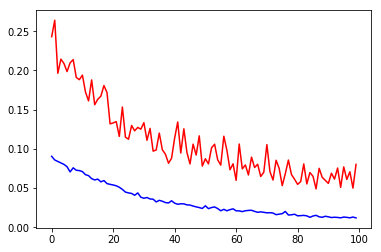

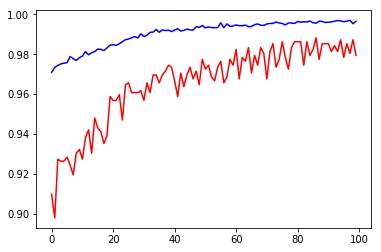

In [85]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

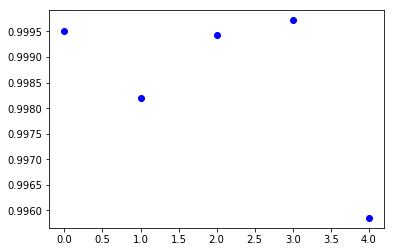

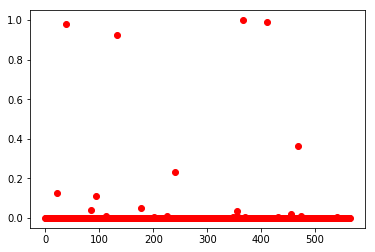

In [86]:
non_idx = np.where(y_test == 0.)[0]
yes_idx = np.where(y_test == 1.)[0]

plt.plot([y_pred[i] for i in yes_idx], 'bo')
plt.show()
plt.plot([y_pred[i] for i in non_idx], 'ro')
plt.show()

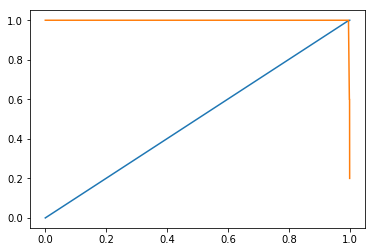

Crossover at 1.00 with specificity 1.00


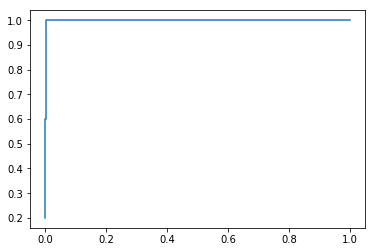

ROC area under curve is 1.00


In [87]:
y_hat = model.predict(x_test)[:,0]
y_true = (y_test + 0.5).astype("int")

fpr, tpr, thresholds = roc_curve(y_true, y_hat)
plt.plot(thresholds, 1.-fpr)
plt.plot(thresholds, tpr)
plt.show()

crossover_index = np.min(np.where(1.-fpr <= tpr))
crossover_cutoff = thresholds[crossover_index]
crossover_specificity = 1.-fpr[crossover_index]
print("Crossover at {0:.2f} with specificity {1:.2f}".format(crossover_cutoff, crossover_specificity))
plt.plot(fpr, tpr)
plt.show()
print("ROC area under curve is {0:.2f}".format(roc_auc_score(y_true, y_hat)))


372


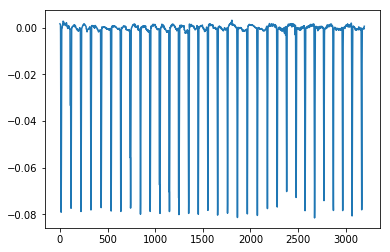

In [88]:
false_positives = np.where(y_hat * (1. - y_test) > 0.5)[0]

for i in false_positives:
    if y_hat[i] > crossover_cutoff:
        print(i)
        plt.plot(x_test[i])
        plt.show()